In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [108]:
temp_state = pd.read_csv('GlobalLandTemperaturesByState.csv',parse_dates=['dt'])

In [109]:
temp_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
dt                               645675 non-null datetime64[ns]
AverageTemperature               620027 non-null float64
AverageTemperatureUncertainty    620027 non-null float64
State                            645675 non-null object
Country                          645675 non-null object
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 24.6+ MB


In [110]:
temp_state.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [111]:
temp_state['AverageTemperature F']= (9/5)*temp_state['AverageTemperature']+32

Selecting for US weather only

In [112]:
US_state_temp = temp_state[temp_state['Country']=='United States']

Selecting California Weather

In [113]:
Cali_temp = US_state_temp[US_state_temp['State']=='California']

Grouping and Averaging by Year



In [114]:
Cali_temp_yr=Cali_temp.groupby(Cali_temp['dt'].dt.year).mean()
Cali_temp_yr.reset_index(inplace=True)
Cali_temp_yr.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,AverageTemperature F
0,1849,14.020083,2.498167,57.23615
1,1850,13.717917,1.879583,56.69225
2,1851,14.143583,2.078417,57.45845
3,1852,13.839833,2.246000,56.91170
4,1853,14.592833,1.749000,58.26710


2013 data is omitted as the year data is incomplete and does not contain all winter months

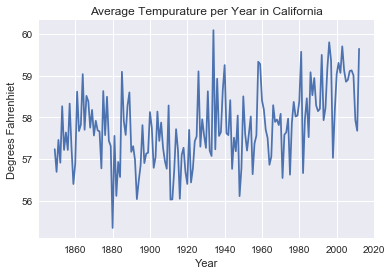

In [115]:
Cali_temp_yr=Cali_temp_yr[Cali_temp_yr['dt']<2013]
plt.plot(Cali_temp_yr['dt'],Cali_temp_yr['AverageTemperature F'])
plt.title('Average Tempurature per Year in California')
plt.xlabel('Year')
plt.ylabel('Degrees Fahrenhiet')

In [116]:
Cali_temp_max_yr=Cali_temp.groupby(Cali_temp['dt'].dt.year).max()
Cali_temp_max_yr.drop('dt',axis=1,inplace=True)
Cali_temp_max_yr.reset_index(inplace=True)

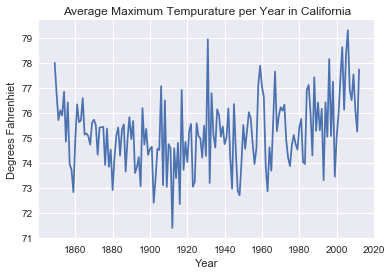

In [117]:
Cali_temp_max_yr=Cali_temp_max_yr[Cali_temp_max_yr['dt']<2013]
plt.plot(Cali_temp_max_yr['dt'],Cali_temp_max_yr['AverageTemperature F'])
plt.title('Average Maximum Tempurature per Year in California')
plt.xlabel('Year')
plt.ylabel('Degrees Fahrenhiet')

In [118]:
Cali_temp_min_yr=Cali_temp.groupby(Cali_temp['dt'].dt.year).min()
Cali_temp_min_yr.drop('dt',axis=1,inplace=True)
Cali_temp_min_yr.reset_index(inplace=True)

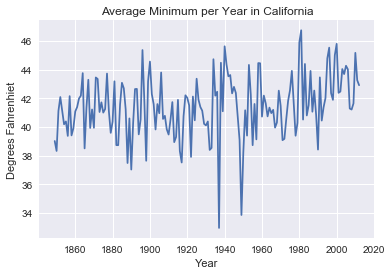

In [119]:
Cali_temp_min_yr=Cali_temp_min_yr[Cali_temp_min_yr['dt']<2013]
plt.plot(Cali_temp_min_yr['dt'],Cali_temp_min_yr['AverageTemperature F'])
plt.title('Average Minimum per Year in California')
plt.xlabel('Year')
plt.ylabel('Degrees Fahrenhiet')

Calculating basic linear fit of warming data

In [120]:
slope,intercept= np.polyfit(y=Cali_temp_yr['AverageTemperature F'],x=Cali_temp_yr['dt'], deg=1)
linear = [slope * i + intercept for i in Cali_temp_yr['dt']]

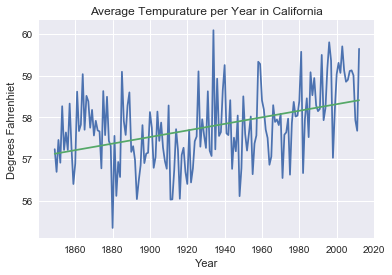

In [121]:
plt.plot(Cali_temp_yr['dt'],Cali_temp_yr['AverageTemperature F'])
plt.plot(Cali_temp_yr['dt'],linear)
plt.title('Average Tempurature per Year in California')
plt.xlabel('Year')
plt.ylabel('Degrees Fahrenhiet')

In [122]:
US_temp_yr=US_state_temp.groupby(US_state_temp['dt'].dt.year).mean()
US_temp_yr.reset_index(inplace=True)
US_temp_yr=US_temp_yr[(US_temp_yr['dt']<2013)&(US_temp_yr['dt']>1850)]

In [123]:
slope,intercept= np.polyfit(y=US_temp_yr['AverageTemperature F'],x=US_temp_yr['dt'], deg=1)
linear = [slope * i + intercept for i in US_temp_yr['dt']]

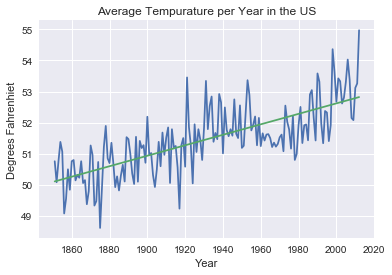

In [124]:
plt.plot(US_temp_yr['dt'],US_temp_yr['AverageTemperature F'])
plt.plot(US_temp_yr['dt'],linear)
plt.title('Average Tempurature per Year in the US')
plt.xlabel('Year')
plt.ylabel('Degrees Fahrenhiet')

In [125]:
states=US_state_temp["State"].unique()

In [126]:
state_codes={'Alabama':'AL', 'Alaska':'AK', 'Arizona':'AZ', 'Arkansas':'AR', 'California':'CA',
       'Colorado':'CO', 'Connecticut':'CT', 'Delaware':'DE', 'District Of Columbia':'DC',
       'Florida':'FL', 'Georgia (State)':'GA', 'Hawaii':'HI', 'Idaho':'ID', 'Illinois':'IL',
       'Indiana':'IN', 'Iowa':'IA', 'Kansas':'KS', 'Kentucky':'KY', 'Louisiana':'LA', 'Maine':'ME',
       'Maryland':'MD', 'Massachusetts':'MA', 'Michigan':'MI', 'Minnesota':'MN', 'Mississippi':'MS',
       'Missouri':'MO', 'Montana':'MT', 'Nebraska':'NE', 'Nevada':'NV', 'New Hampshire':'NH',
       'New Jersey':'NJ', 'New Mexico':'NM', 'New York':'NY', 'North Carolina':'NC',
       'North Dakota':'ND', 'Ohio':'OH', 'Oklahoma':'OK', 'Oregon':'OR', 'Pennsylvania':'PA',
       'Rhode Island':'RI', 'South Carolina':'SC', 'South Dakota':'SD', 'Tennessee':'TN',
       'Texas':'TX', 'Utah':'UT', 'Vermont':'VT', 'Virginia':'VA', 'Washington':'WA',
       'West Virginia':'WV', 'Wisconsin':'WI', 'Wyoming':'WY'}

In [127]:
US_state_temp["Codes"]=US_state_temp["State"]
US_state_temp.replace({'Codes':state_codes}, inplace = True)

C:\Users\shane\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\shane\Anaconda3\lib\site-packages\pandas\core\generic.py:3485: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Creating a loop to run through each state and return the average increase in temperature per year, assuming a linear increase

In [128]:
listmean=[]
for state in US_state_temp["State"].unique():
    state_temp=US_state_temp[US_state_temp['State']==state]
    state_temp_yr=state_temp.groupby(state_temp['dt'].dt.year).mean()
    state_temp_yr.reset_index(inplace=True)
    state_temp_yr=state_temp_yr[(state_temp_yr['dt']>1850)&(state_temp_yr['dt']<2013)]
    slope,intercept= np.polyfit(y=state_temp_yr['AverageTemperature F'],x=state_temp_yr['dt'], deg=1)
    difference_years=state_temp_yr['dt'].max()-state_temp_yr['dt'].min()
    code=US_state_temp[US_state_temp['State']==state]['Codes'].unique()[0]
    listmean.append([state,slope,difference_years,state_temp_yr['dt'].min(),state_temp_yr['dt'].max(),code])
states_slope_data=pd.DataFrame(data=listmean,columns=['State','Slope','Years','1st Yr','Last Yr','Codes'])

In [129]:
states_slope_data.sort_values('Slope',ascending=False).head()

,State,Slope,Years,1st Yr,Last Yr,Codes
23,Minnesota,0.023509,161,1851,2012,MN
34,North Dakota,0.022959,161,1851,2012,ND
29,New Hampshire,0.021732,161,1851,2012,NH
45,Vermont,0.021638,161,1851,2012,VT
21,Massachusetts,0.021468,161,1851,2012,MA


In [130]:
data = dict(type ='choropleth',
           colorscale = 'YIOrRD',
           locations = states_slope_data['Codes'],
           locationmode = 'USA-states',
           z = states_slope_data['Slope'],
           marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
           colorbar = {'title':'Degree increase in F'})

In [132]:
layout = dict(title = 'Increase in Average Temp in US per Year from 1850-2012',geo = dict(scope = 'usa'))

In [133]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [134]:
choromap2 = go.Figure(data = [data], layout = layout)

In [135]:
iplot(choromap2)

In [136]:
listmean=[]
for state in states:
    state_temp=US_state_temp[US_state_temp['State']==state]
    state_temp_yr=state_temp.groupby(state_temp['dt'].dt.year).mean()
    state_temp_yr.reset_index(inplace=True)
    state_temp_yr=state_temp_yr[(state_temp_yr['dt']>1900)&(state_temp_yr['dt']<2013)]
    slope,intercept= np.polyfit(y=state_temp_yr['AverageTemperature F'],x=state_temp_yr['dt'], deg=1)
    difference_years=state_temp_yr['dt'].max()-state_temp_yr['dt'].min()
    code=US_state_temp[US_state_temp['State']==state]['Codes'].unique()[0]
    listmean.append([state,slope,difference_years,state_temp_yr['dt'].min(),state_temp_yr['dt'].max(),code])
states_slope_data=pd.DataFrame(data=listmean,columns=['State','Slope','Years','1st Yr','Last Yr','Codes'])

In [137]:
data = dict(type ='choropleth',
           colorscale = 'YIOrRD',
           locations = states_slope_data['Codes'],
           locationmode = 'USA-states',
           z = states_slope_data['Slope'],
           marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
           colorbar = {'title':'Degree increase in F'})

In [138]:
layout = dict(title = 'Increase in Average Temp in US per Year from 1900-2012',geo = dict(scope = 'usa'))

In [139]:
choromap2 = go.Figure(data = [data], layout = layout)
iplot(choromap2)

In [149]:
listmin=[]
for state in states:
    state_temp=US_state_temp[US_state_temp['State']==state]
    state_temp_yr=state_temp.groupby(state_temp['dt'].dt.year).min()
    state_temp_yr.drop('dt',axis=1,inplace=True)
    state_temp_yr.reset_index(inplace=True)
    state_temp_yr=state_temp_yr[(state_temp_yr['dt']>1900)&(state_temp_yr['dt']<2013)]
    slope,intercept= np.polyfit(y=state_temp_yr['AverageTemperature F'],x=state_temp_yr['dt'], deg=1)
    difference_years=state_temp_yr['dt'].max()-state_temp_yr['dt'].min()
    code=US_state_temp[US_state_temp['State']==state]['Codes'].unique()[0]
    listmin.append([state,slope,difference_years,state_temp_yr['dt'].min(),state_temp_yr['dt'].max(),code])
states_slope_data=pd.DataFrame(data=listmin,columns=['State','Slope','Years','1st Yr','Last Yr','Codes'])

In [150]:
data = dict(type ='choropleth',
           colorscale = 'YIOrRD',
           locations = states_slope_data['Codes'],
           locationmode = 'USA-states',
           z = states_slope_data['Slope'],
           marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
           colorbar = {'title':'Degree increase in F'})

In [151]:
layout = dict(title = 'Average Increase in Minimum Temp in US per Year from 1900-2012',geo = dict(scope = 'usa'))

In [152]:
choromap2 = go.Figure(data = [data], layout = layout)
iplot(choromap2)

In [ ]:
listmax=[]
for state in states:
    state_temp=US_state_temp[US_state_temp['State']==state]
    state_temp_yr=state_temp.groupby(state_temp['dt'].dt.year).max()
    state_temp_yr.drop('dt',axis=1,inplace=True)
    state_temp_yr.reset_index(inplace=True)
    state_temp_yr=state_temp_yr[(state_temp_yr['dt']>1900)&(state_temp_yr['dt']<2013)]
    slope,intercept= np.polyfit(y=state_temp_yr['AverageTemperature F'],x=state_temp_yr['dt'], deg=1)
    difference_years=state_temp_yr['dt'].max()-state_temp_yr['dt'].min()
    code=US_state_temp[US_state_temp['State']==state]['Codes'].unique()[0]
    listmax.append([state,slope,difference_years,state_temp_yr['dt'].min(),state_temp_yr['dt'].max(),code])
states_slope_data=pd.DataFrame(data=listmax,columns=['State','Slope','Years','1st Yr','Last Yr','Codes'])

In [ ]:
data = dict(type ='choropleth',
           colorscale = 'YIOrRD',
           locations = states_slope_data['Codes'],
           locationmode = 'USA-states',
           z = states_slope_data['Slope'],
           marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
           colorbar = {'title':'Degree increase in F'})

In [ ]:
layout = dict(title = 'Average Increase in Maximum Temp in US per Year from 1900-2012',geo = dict(scope = 'usa'))

In [154]:
choromap2 = go.Figure(data = [data], layout = layout)
iplot(choromap2)

Function to graph max/min/mean for each state. Will return an error if typed incorrectly or if the minimum year is before data collection began.

In [155]:
def state_temp(state_name, max_min_mean, min_year):
    state_temp = US_state_temp[US_state_temp['State']==state_name]
    dates=range(min_year,2013)
    if max_min_mean=='mean':
        state_temp_yr=state_temp.groupby(state_temp['dt'].dt.year).mean()
        state_temp_yr.reset_index(inplace=True)
        state_temp_yr=state_temp_yr[(state_temp_yr['dt']>=min_year)&(state_temp_yr['dt']<2013)]
        temps=state_temp_yr['AverageTemperature F']
        title='Average Tempurature per Year in {}'.format(state_name)
    elif max_min_mean=='max':
        state_temp_max_yr=state_temp.groupby(state_temp['dt'].dt.year).max()
        state_temp_max_yr.drop('dt',axis=1,inplace=True)
        state_temp_max_yr.reset_index(inplace=True)
        state_temp_max_yr=state_temp_max_yr[(state_temp_max_yr['dt']<2013)&(state_temp_max_yr['dt']>=min_year)]
        temps=state_temp_max_yr['AverageTemperature F']
        title='Average Maximum Tempurature per Year in {}'.format(state_name)
    elif max_min_mean=='min':  
        state_temp_min_yr=state_temp.groupby(state_temp['dt'].dt.year).min()
        state_temp_min_yr.drop('dt',axis=1,inplace=True)
        state_temp_min_yr.reset_index(inplace=True)
        state_temp_min_yr=state_temp_min_yr[(state_temp_min_yr['dt']<2013)&(state_temp_min_yr['dt']>=min_year)]
        temps=state_temp_min_yr['AverageTemperature F']
        title='Average Minimum Tempurature per Year in {}'.format(state_name)
    else:
        print('Data entered incorrectly')

  
    slope,intercept= np.polyfit(y=temps,x=dates, deg=1)
    linear = [slope * i + intercept for i in dates] 
        
        
    plt.figure(figsize=(9,6))    
    plt.plot(dates,temps)
    plt.plot(dates,linear)    
    plt.title(title)

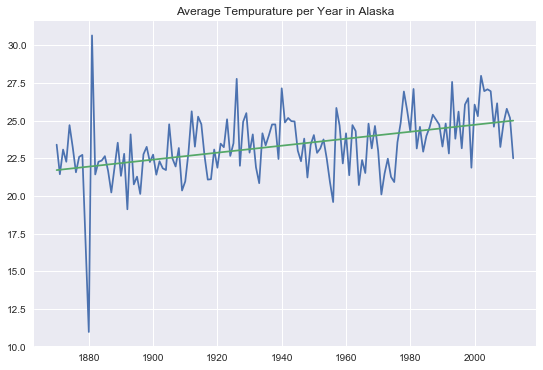

In [157]:
state_temp('Alaska','mean',1870)